In [76]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import math

def errorify(value):
    error_factors = [0.01,0.1,10,100]
    error_value = value * rnd.choice(error_factors)
    return error_value

def error_price(price):
    return errorify(price)

def error_quantity(quantity):
    return errorify(quantity)

def gen_product(orders_no, price_init, price_end, order_qunat_rng, error_prob, bend):
    price_curr = price_init
    price_diff = (price_end - price_init)
    price_delta = price_diff/orders_no
    product_orders = []
    for i in range(orders_no):
        price = round(price_curr + (rnd.uniform(-0.08,0.08) * price_init), 2)
        quantity = rnd.randrange(order_qunat_rng[0], order_qunat_rng[1])
        if rnd.random() < error_prob:
            if rnd.random() > 0.5:
                price = error_price(price)
            else:
                quantity = error_quantity(quantity)
        product_orders.append((price, quantity))
        price_curr += price_delta * rnd.uniform((i/orders_no), 0.5 + (i/orders_no))

    return product_orders

def gen_products(no_products, no_orders, price_inits, price_ends, order_quant_rngs, error_probs, bends):
    products_x = []
    products_y_price = []
    products_y_quantity = []
    for i in range(no_products):
        product = gen_product(no_orders[i], price_inits[i], price_ends[i], order_quant_rngs[i], error_probs[i], bends[i])
        y_price = [x[0] for x in product]
        y_quantity = [x[1] for x in product]
        products_x.append([x for x in range(no_orders[i])])
        products_y_price.append(y_price)
        products_y_quantity.append(y_quantity)

    return (products_x, products_y_price, products_y_quantity)

def get_coeffs(x, y):
    x_np = np.array(x). reshape((-1,1))
    y_price = np.array(y)
    model_price = LinearRegression().fit(x_np, y_price)

    return (model_price.coef_[0], model_price.intercept_)

def print_with_approx(x, y, coeffs):
    n = len(x)
    plt.scatter(x, y)
    plt.plot([0,n], [coeffs[1], n * coeffs[0] + coeffs[1]])
    plt.show()
    plt.clf()

def remove_outliers(x, y, coeffs):
    n = len(x)
    if n <= 2:
        return (x, y, 0)
    y_exp = [(x * coeffs[0] + coeffs[1]) for x in x]

    SSE = 0

    for i in range(n):
        SSE += (y[i] - y_exp[i])**2

    s = math.sqrt(SSE/(n-2))
    x_good = []
    y_good = []
    outlier_count = 0

    for i in range(n):
        if abs(y[i] - y_exp[i]) < abs(2 * s):
            x_good.append(i)
            y_good.append(y[i])
        else:
            outlier_count += 1

    return (x_good, y_good, outlier_count)

def clean_data(x, y):
    coeffs = get_coeffs(x,y)
    outlier_count = 1
    while outlier_count > 0:
        x, y, outlier_count = remove_outliers(x, y, coeffs)
        coeffs = get_coeffs(x, y)
    
    return (x, y)

# Generacja przykładowych danych

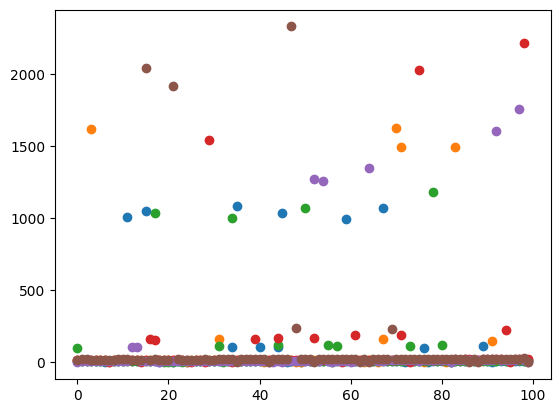

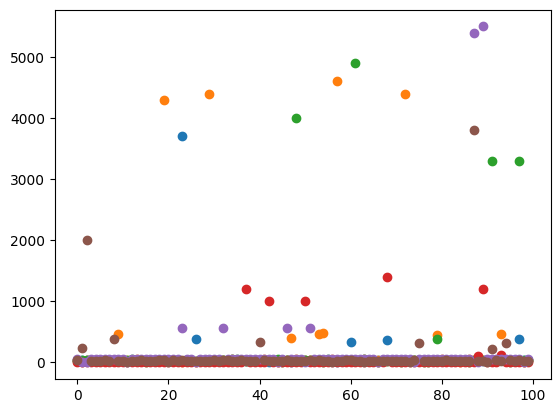

<Figure size 640x480 with 0 Axes>

In [77]:
n = 6
no_orders = [100] * n
price_inits = [10,15,10,15,10,20]
price_ends = [12,17,15,25,20,30]
order_quant_rngs = [(30,40), (40,50), (30,50), (10,15), (50,60), (20,40)]
error_probs = [0.3] * n
bends = [2,1,5,2,1,5]
x_price, y_price, y_quantity = gen_products(n, no_orders, price_inits, price_ends, order_quant_rngs, error_probs, bends)
x_quantity = x_price.copy()
for i in range(n):
    plt.scatter(x_price[i], y_price[i])
plt.show()
plt.clf()
for i in range(n):
    plt.scatter(x_quantity[i], y_quantity[i])
plt.show()
plt.clf()

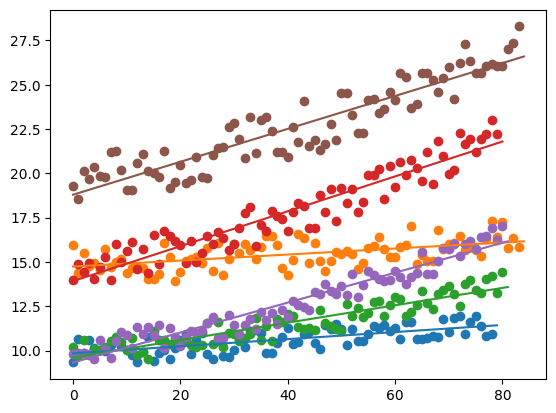

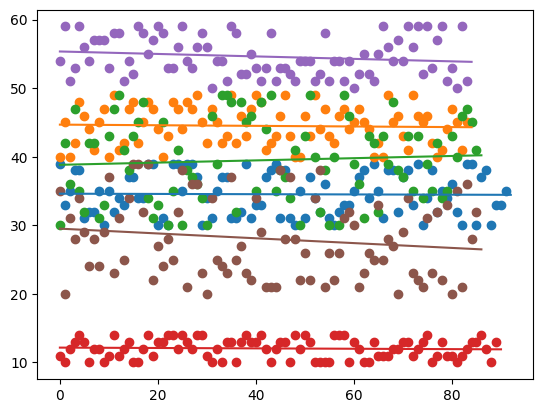

<Figure size 640x480 with 0 Axes>

In [78]:
for i in range(n):
    x_price[i], y_price[i] = clean_data(x_price[i], y_price[i])
    coeffs = get_coeffs(x_price[i],y_price[i])
    plt.scatter(x_price[i], y_price[i])
    m = len(x_price[i])
    plt.plot([0,m], [coeffs[1], m * coeffs[0] + coeffs[1]])
plt.show()
plt.clf()
for i in range(n):
    x_quantity[i], y_quantity[i] = clean_data(x_quantity[i], y_quantity[i])
    coeffs = get_coeffs(x_quantity[i],y_quantity[i])
    plt.scatter(x_quantity[i], y_quantity[i])
    m = len(x_quantity[i])
    plt.plot([0,m], [coeffs[1], m * coeffs[0] + coeffs[1]])
plt.show()
plt.clf()